## Librerias

In [18]:
import sys
sys.path.append('../')
import funciones as fun
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle
from empiricaldist import Cdf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, svm
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, TweedieRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from yellowbrick.regressor import ResidualsPlot
from hyperopt import hp, fmin, tpe, Trials

In [19]:
from importlib import reload
import funciones  

# Recargar el módulo
reload(funciones)

<module 'funciones' from 'c:\\Users\\maria\\Desktop\\Business data\\2º Curso\\Casos practicos\\Reto 8\\R8_Naranja\\funciones.py'>

## Lectura datos

In [20]:
comp_d = pd.read_csv('Datos/Originales/Comp_D.csv')

In [21]:
comp_d.head()

,Presion,Temperatura,Frecuencia,Potencia_Medida
0,0.743207,12.1,43.480383,119.583697
1,0.744016,12.1,47.441743,122.414787
2,0.744196,12.8,49.432157,122.943571
3,0.744104,12.8,51.654600,123.847209
4,0.744064,13.7,53.971603,125.474319


## Estandarizar el df

In [22]:
x = comp_d.iloc[:,:-1]
y = comp_d.iloc[:, -1]

In [23]:
# Estandarizar el dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(x)
X = pd.DataFrame(X, columns=x.columns)

In [25]:
# Guardo el scaler
with open('Modelos/Comp_d/scaler_model.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Train Test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 44)

# Análisis de las variables

In [27]:
y.describe()

count    41789.000000
mean        95.829053
std         21.200003
min         66.901101
25%         75.862089
50%         90.584560
75%        115.395048
max        132.000000
Name: Potencia_Medida, dtype: float64

In [28]:
x.describe()

,Presion,Temperatura,Frecuencia
count,41789.000000,41789.000000,41789.000000
mean,0.759691,12.852751,26.287229
std,0.012289,6.170078,26.868740
min,0.739489,-5.400000,0.000000
25%,0.748131,8.800000,0.000000
50%,0.759044,12.500000,20.380947
75%,0.768456,16.800000,44.000000
max,0.789103,38.100000,100.000000


In [29]:
fun.graficar_correlaciones(X, y)

# Gráfico de distribución

c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



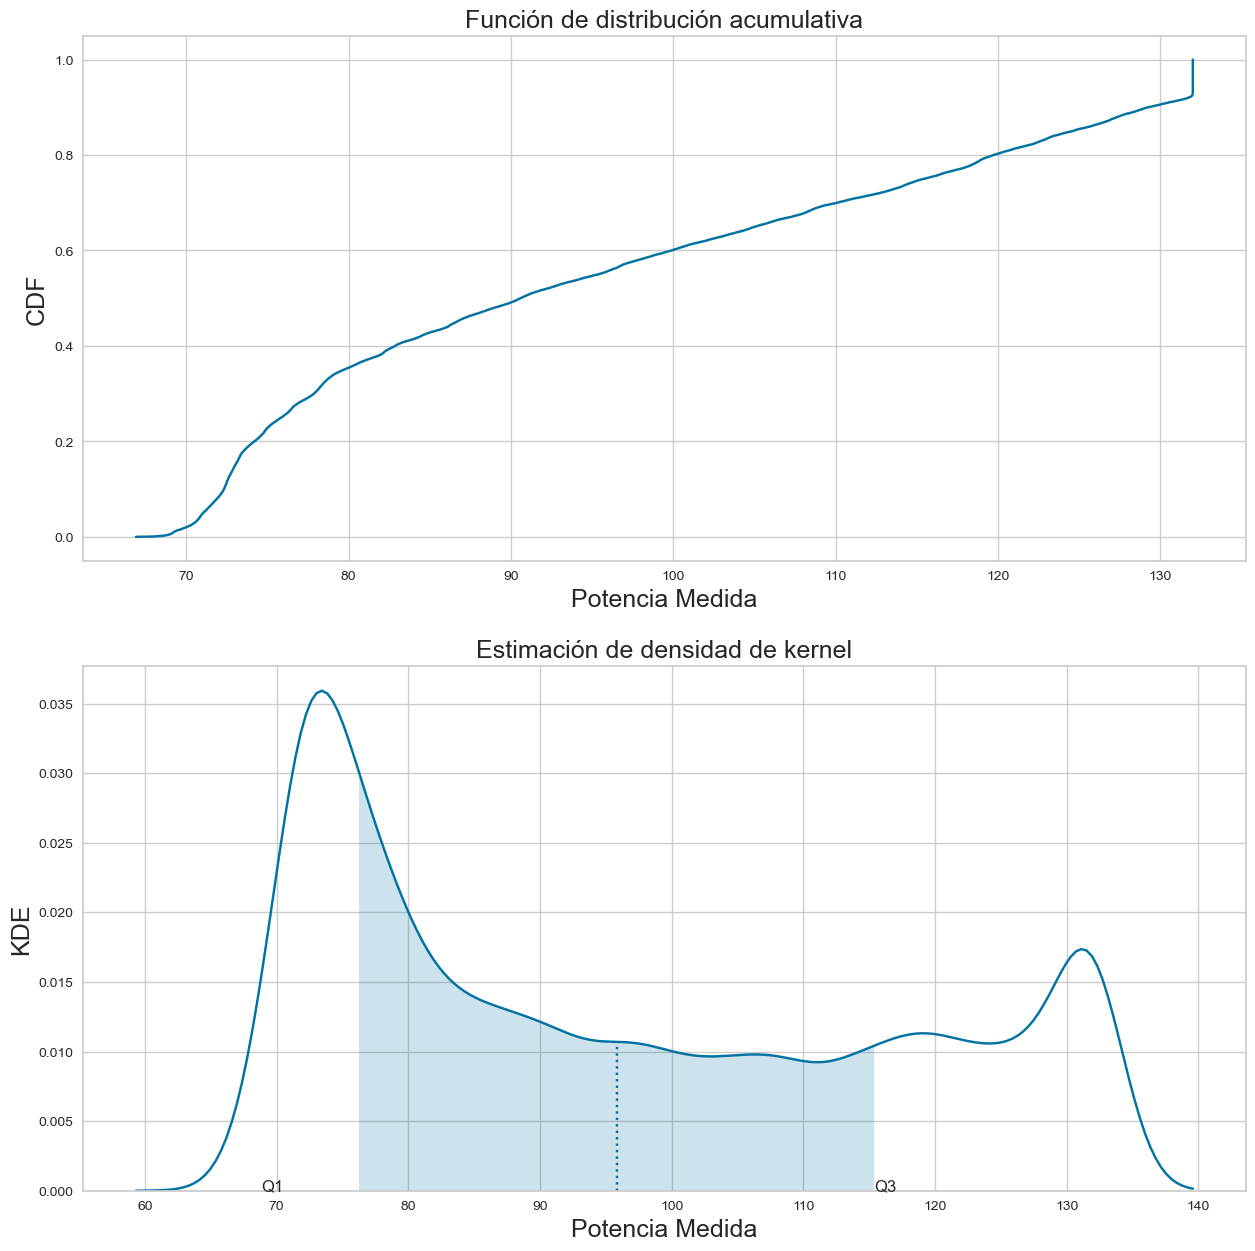

In [30]:
fun.grafico_distribucion(y)

## Modelos Base

In [31]:
compresor = 'd'

In [32]:
modelos = [
    ('LinearRegression', LinearRegression()),
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('ElasticNet', ElasticNet()),
    ('RandomForestRegressor', RandomForestRegressor(random_state=42, n_jobs=-1)),
    ('SVR', SVR(kernel='linear')),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor(random_state=44)),
    ('TweedieRegressor', TweedieRegressor()),
    ('GradientBoostingRegressor', GradientBoostingRegressor(random_state=44))
]

LinearRegression - TRAIN = R^2: 0.9627004772991239, RMSE: 4.092401244858155
 TEST = R^2: 0.9613757346723429, RMSE: 4.173839160382788


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



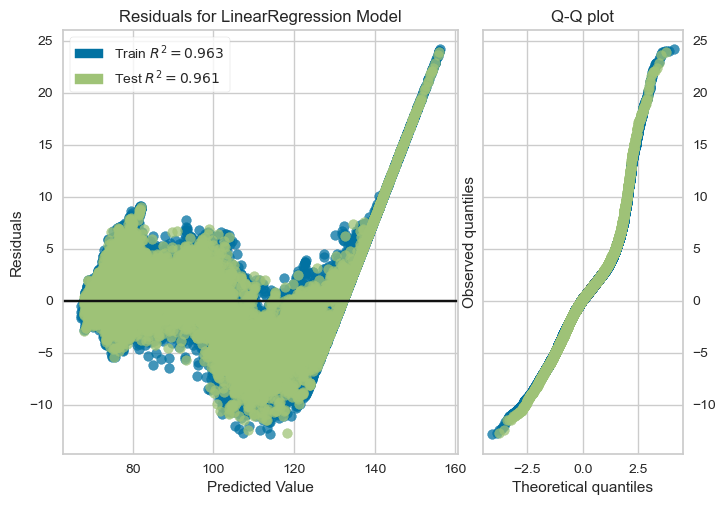

Lasso - TRAIN = R^2: 0.9101580611426732, RMSE: 6.350753675429764
 TEST = R^2: 0.9084176546941164, RMSE: 6.42704697364914


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but Lasso was fitted with feature names



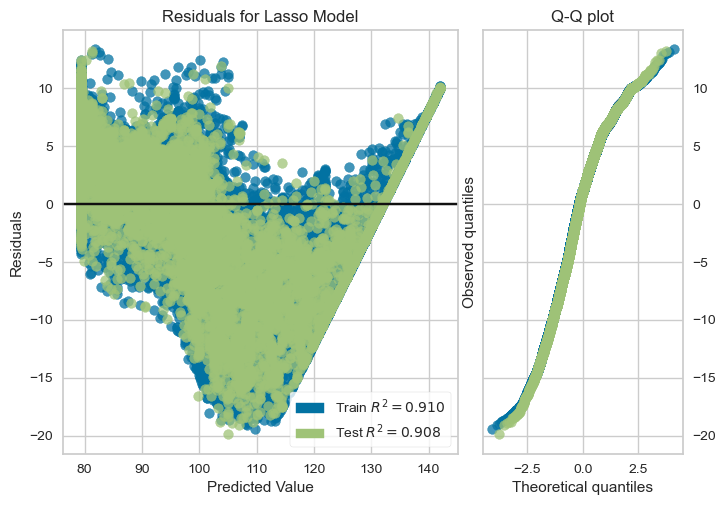

Ridge - TRAIN = R^2: 0.9627000747187406, RMSE: 4.092421216392709
 TEST = R^2: 0.9613778274383795, RMSE: 4.173726083964562


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but Ridge was fitted with feature names



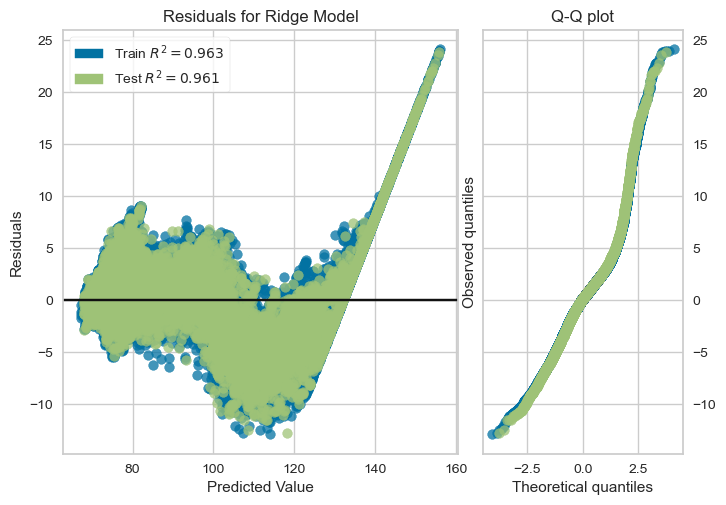

ElasticNet - TRAIN = R^2: 0.23600616882939623, RMSE: 18.52022769128339
 TEST = R^2: 0.2351394267952046, RMSE: 18.573627477211783


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but ElasticNet was fitted with feature names



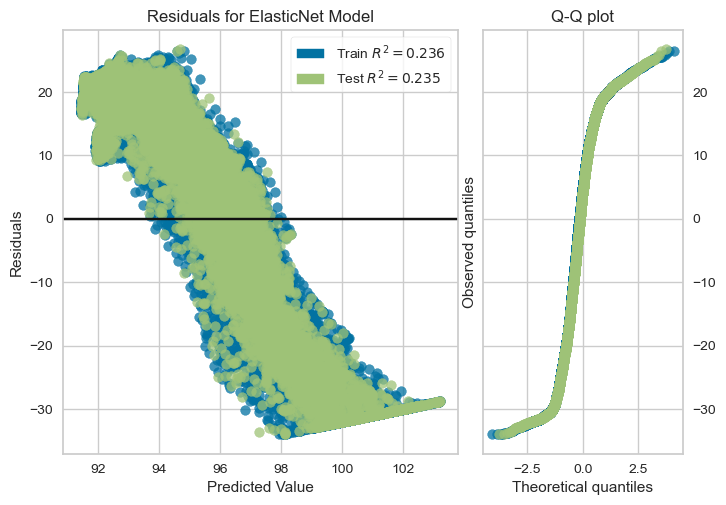

RandomForestRegressor - TRAIN = R^2: 0.9947997528990769, RMSE: 1.5279522041524352
 TEST = R^2: 0.9948112911413178, RMSE: 1.5298020726128279


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



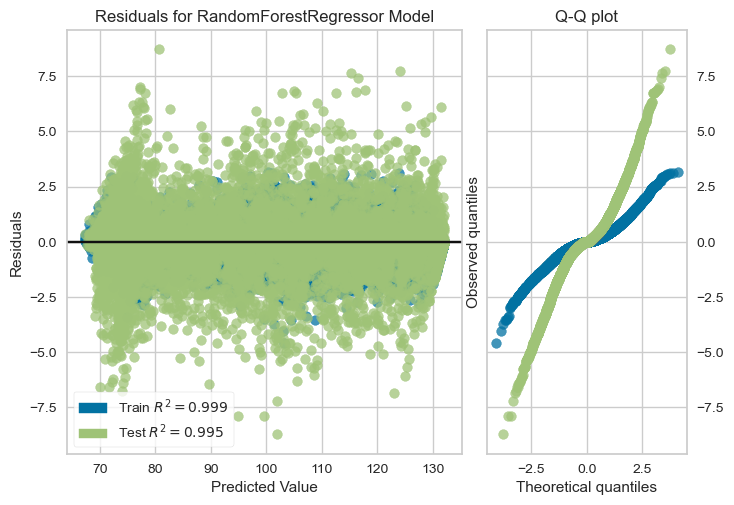

SVR - TRAIN = R^2: 0.9586773548117357, RMSE: 4.307660831531615
 TEST = R^2: 0.9568478524766336, RMSE: 4.411708412512647


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names



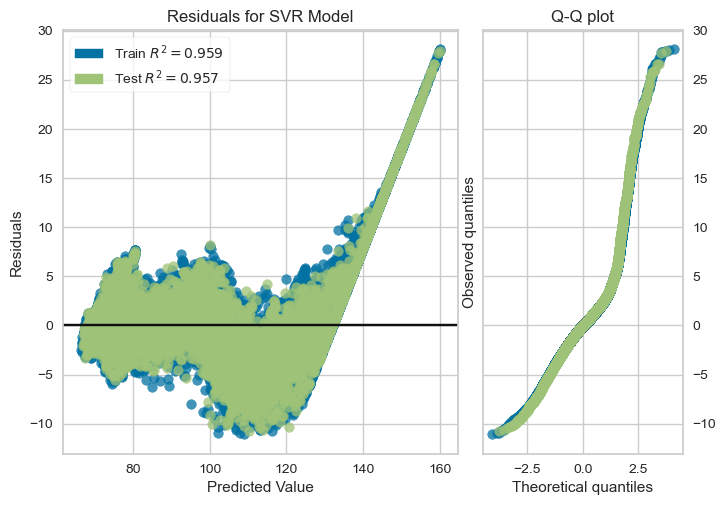

KNeighborsRegressor - TRAIN = R^2: 0.9942360372236534, RMSE: 1.608566950586684
 TEST = R^2: 0.9945466967789008, RMSE: 1.568322657727074


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



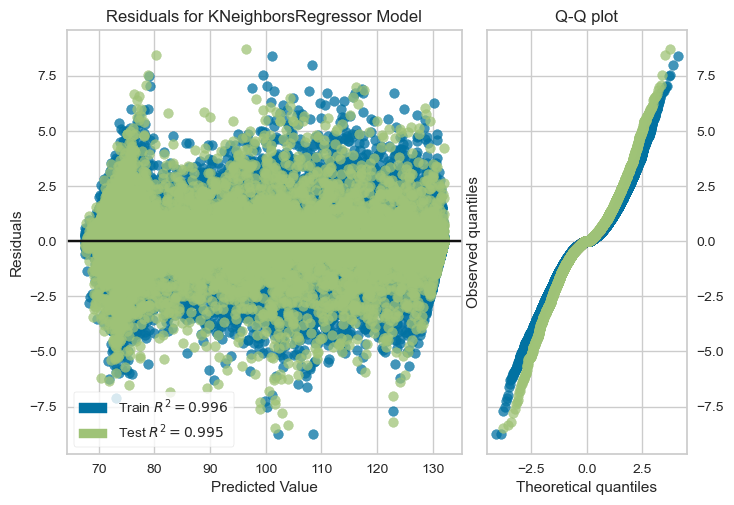

DecisionTreeRegressor - TRAIN = R^2: 0.9910013337095809, RMSE: 2.0097904338908785
 TEST = R^2: 0.9911065720375589, RMSE: 2.0028120207249245


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



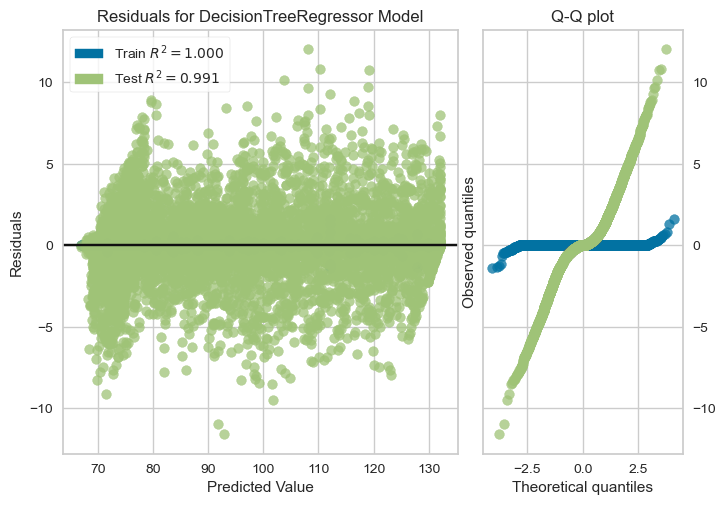

TweedieRegressor - TRAIN = R^2: 0.14808520157567034, RMSE: 19.556852297802816
 TEST = R^2: 0.14736106518974834, RMSE: 19.61047773385879


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but TweedieRegressor was fitted with feature names



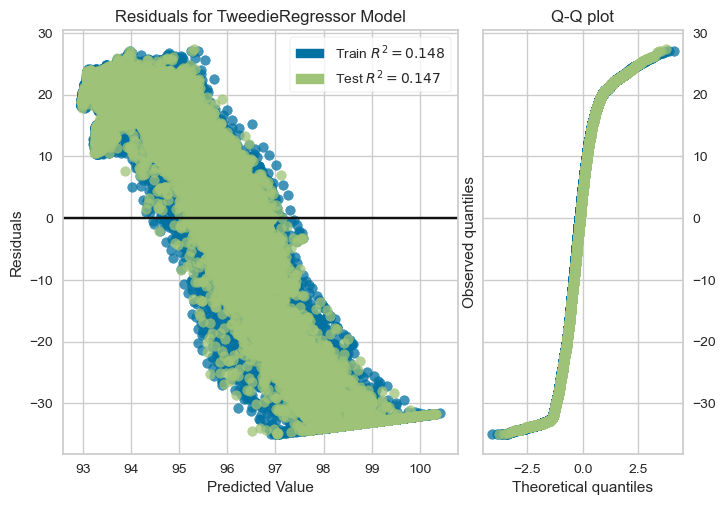

GradientBoostingRegressor - TRAIN = R^2: 0.9926273252040424, RMSE: 1.8192312650625304
 TEST = R^2: 0.9927076736241545, RMSE: 1.8135880370949036


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



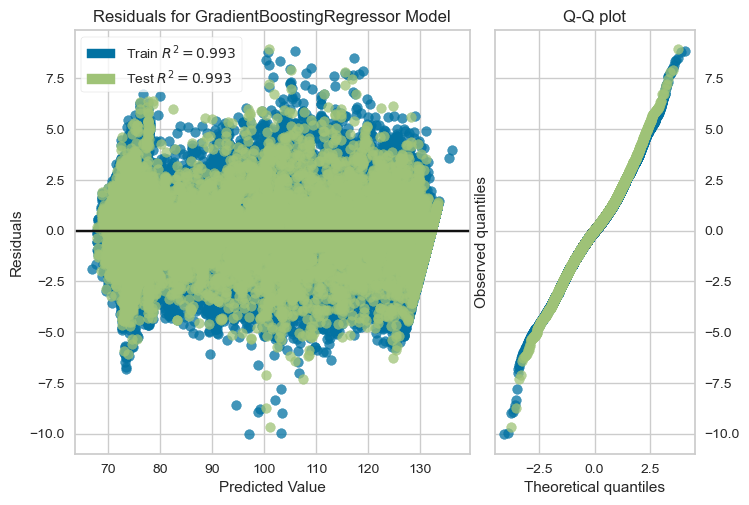

In [33]:
metricas_modelos = {}

for nombre_modelo, modelo in modelos:
    metricas_modelos[nombre_modelo] = fun.evaluar_modelo(modelo, nombre_modelo, compresor, X_train, y_train, X_test, y_test)

## OPTIMIZACIÓN DE HIPERPARÁMETROS

In [67]:
space = {
    'n_estimators': hp.randint('n_estimators', 50, 300),
    'max_features': hp.choice('max_features', [None, 'sqrt', 'log2']),
    'max_depth': hp.randint('max_depth', 1, 20),
    'min_samples_split': hp.randint('min_samples_split', 2, 100),  # Genera enteros entre 2 e infinito
    'min_samples_leaf': hp.randint('min_samples_leaf', 1, 100)  # Genera enteros entre 1 e infinito
}


# Definir la función objetivo
def objective(space):
    model = RandomForestRegressor(
        n_estimators=space['n_estimators'],
        min_samples_split=space['min_samples_split'],
        max_depth=space['max_depth'],
        min_samples_leaf=space['min_samples_leaf'],
        max_features=space['max_features'], 
        random_state=42,
        n_jobs=10
    )
    r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
    return -r2

# Ejecutar la optimización de hiperparámetros
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=200, trials=trials)

# Imprimir los mejores hiperparámetros encontrados
print("Best Hyperparameters:", best)

  0%|          | 0/200 [00:03<?, ?trial/s, best loss=?]


KeyboardInterrupt: 

100%|██████████| 50/50 [06:34<00:00,  7.90s/trial, best loss: -0.9957095822630231]
Best Hyperparameters: {'max_depth': 3, 'max_features': 0, 'min_samples_leaf': 0, 'min_samples_split': 0, 'n_estimators': 5}

100%|██████████| 50/50 [09:27<00:00, 11.35s/trial, best loss: -0.9951415854091948]
Best Hyperparameters: {'max_depth': 0, 'max_features': 0, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 5}

00%|██████████| 200/200 [35:18<00:00, 10.59s/trial, best loss: -0.9953834440464039]
Best Hyperparameters: {'max_depth': 18, 'max_features': 0, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 133}

## Modelo con hiperparámetros optimizados

In [30]:
# Definir los modelos
modelos = [RandomForestRegressor(max_depth=0, max_features=0, min_samples_leaf=6, min_samples_split=10, n_estimators=5)]


# Realizar la validación cruzada y calcular la media de las puntuaciones para cada modelo
for modelo in modelos:
    nombre_modelo = f'{type(modelo).__name__}_optimizado'
    
    # Calcular R^2
    r2_scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
    r2_score_promedio = np.mean(r2_scores)
    
    # Calcular RMSE
    rmse_scores = cross_val_score(modelo, X, y, cv=5, scoring=make_scorer(mean_squared_error))
    rmse_score_promedio = np.sqrt(np.mean(rmse_scores))
    
    # Almacenar los resultados en el diccionario
    resultados_modelos[nombre_modelo] = {'R^2': r2_score_promedio, 'RMSE': rmse_score_promedio}
    
    # Entrenar el modelo con todos los datos
    modelo.fit(X, y)
    
    # Guardar el modelo con pickle en la carpeta 'Modelos'
    ruta_modelo = os.path.join('Modelos/Comp_b', f'{nombre_modelo}_modelo.pkl')
    with open(ruta_modelo, 'wb') as modelo_archivo:
        pickle.dump(modelo, modelo_archivo)

    print(f"{nombre_modelo} - R^2: {r2_score_promedio}, RMSE: {rmse_score_promedio}")

    # Agregar análisis de residuos
    visualizer = ResidualsPlot(modelo, hist=False, qqplot=True)
    visualizer.fit(X_train, y_train)  # Fit the data to the visualizer
    visualizer.score(X_test, y_test)
    visualizer.show()  # Finalize and render the figure

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_depth' parameter of RandomForestRegressor must be an int in the range [1, inf) or None. Got 0 instead.
